<a href="https://colab.research.google.com/github/AndrewPiasecki/CaliforniaHousing/blob/main/Assignment2_MachingLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
from sklearn import impute, preprocessing, model_selection, linear_model, ensemble

In [104]:
url = "https://raw.githubusercontent.com/AndrewPiasecki/CaliforniaHousing/main/California_Housing_Data.csv"
df = pd.read_csv(url)
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True) ## Give Ocean_Proximity a numeric representation

print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         496         177         7.2574              352100   
3         558         219         5.6431              341300   
4         565         259         3.8462              342200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1     

## Data Preprocessing


In [105]:
# Bedroom has Blanks so change those to average
bedroomChange = sk.impute.SimpleImputer(strategy='median')
df['total_bedrooms'] = bedroomChange.fit_transform(df[['total_bedrooms']])

# Scale numerical features
## scaler = sk.preprocessing.StandardScaler()
## df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
    ## 'population', 'households', 'median_income']] = scaler.fit_transform(df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                                                                               ## 'population', 'households', 'median_income']])

# Display the preprocessed dataset
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         496         177         7.2574              352100   
3         558         219         5.6431              341300   
4         565         259         3.8462              342200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1     

## Model Selection

In [106]:
## print(df.head())

# Drop mhv for x to predict it (y)
X = df.drop('median_house_value', axis=1)
Y = df['median_house_value']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

linear_reg_model = linear_model.LinearRegression()
ridge_reg_model = linear_model.Ridge()
random_forest_model = ensemble.RandomForestRegressor()




## Model Training and Evaluation



In [107]:
linear_reg_model.fit(X_train, Y_train)
ridge_reg_model.fit(X_train, Y_train)
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor()

Predictions

In [108]:
linear_reg_predictions = linear_reg_model.predict(X_test)
ridge_reg_predictions = ridge_reg_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)


Evaluation

In [109]:
linear_reg_score = linear_reg_model.score(X_test, Y_test)
ridge_reg_score = ridge_reg_model.score(X_test, Y_test)
random_forest_score = random_forest_model.score(X_test, Y_test)

print(f"Linear Regression Score: {linear_reg_score:.4f}")
print(f"Ridge Regression Score: {ridge_reg_score:.4f}")
print(f"Random Forest Regression Score: {random_forest_score:.4f}")

Linear Regression Score: 0.6394
Ridge Regression Score: 0.6393
Random Forest Regression Score: 0.8183


Plots of Actual vs Predicted

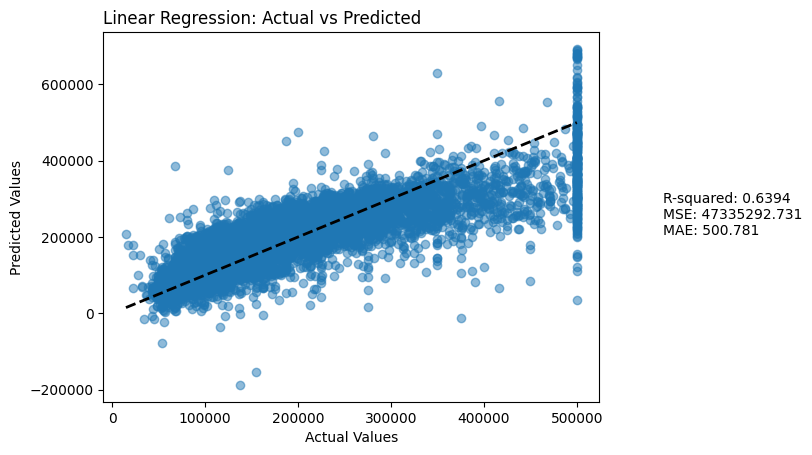

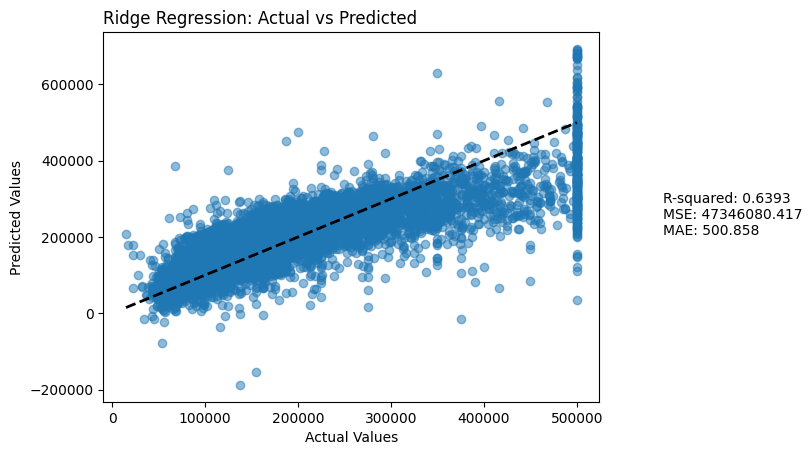

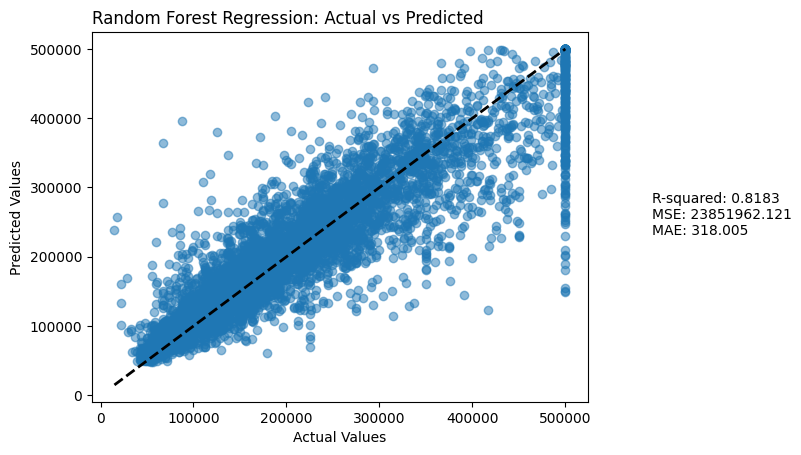

In [110]:
def plotR2(model_name, model, X_test, Y_test):
    predictions = model.predict(X_test)

    plt.scatter(Y_test, predictions, alpha=0.5)
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Best Fit Line

    r_squared = model.score(X_test, Y_test)
    mse = np.mean((Y_test - predictions)**2)
    mae = np.mean(np.abs(Y_test - predictions))

    # Scale down MSE and MAE
    mse_scaled = mse / 100
    mae_scaled = mae / 100

    #Syntax
    textstr = '\n'.join((f'R-squared: {r_squared:.4f}', f'MSE: {mse_scaled:.3f}', f'MAE: {mae_scaled:.3f}'))
    plt.title(f'{model_name}: Actual vs Predicted', loc='left')
    plt.gcf().text(1, 0.5, textstr, fontsize=10, verticalalignment='center', ha='left')

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Calling function
plotR2('Linear Regression', linear_reg_model, X_test, Y_test)
plotR2('Ridge Regression', ridge_reg_model, X_test, Y_test)
plotR2('Random Forest Regression', random_forest_model, X_test, Y_test)



## Prediction and Analysis of Tuned Model

Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


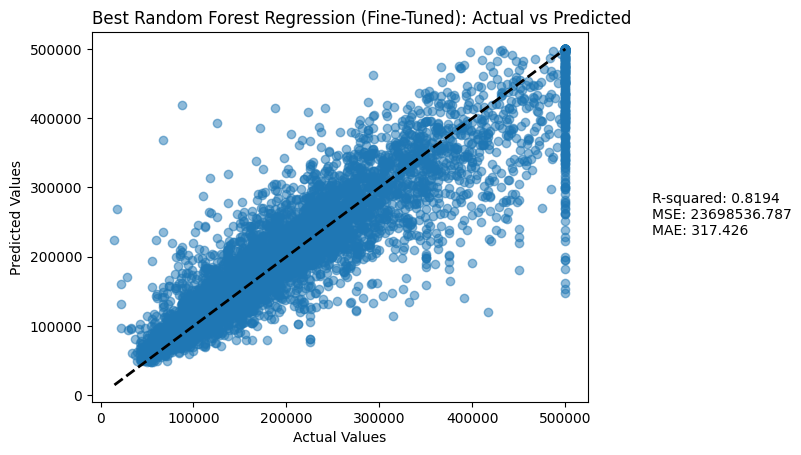

In [99]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for Random Forest (Googled What Parameters)
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


random_forest_model = ensemble.RandomForestRegressor()

# Grid Search (Aka the long wait time HAHA)
rf_grid_search = GridSearchCV(random_forest_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, Y_train)


print("Best Random Forest Hyperparameters:", rf_grid_search.best_params_)

#Train with hyperparam
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the  model
plotR2('Best Random Forest Regression (Fine-Tuned)', best_rf_model, X_test, Y_test)


## Summary

After a comprehensive exploration of various regression models, it is evident that the **Random Forest Regression Model** stands out as the most successful and accurate predictor of house prices.  I found that it had a clear advantage in predicting the actual House Price when compared to Linear and Ridge Regression. Some of they key takeaways that showed this are:


1.  **R^2 Evaluation:**
   * When I tested the different methods, R^2 was the most apparant in showing which model was better.
   * With an original score of 0.8183 compared to the Ridge and Linear Regression, which scored around a 6.3, proved the clear advantage Random Forest had

2.  **Hyperparamter Tuning:**
   * While GridSearchCV takes alot of time and money, it was able to bring out the best possible outcome for Random Forest Regression
   * It took roughly 50 minutes to perform, but it improved our accuracy by roughly .0013, which may not seem like a crazy amount, but accuracy on such a large scale is always preferred
   * It optimized the number of estimators, maximum depth, minimum samples split, and minimum samples leaf

3. **Actual vs Predicted Visualization:**
   * The visualizations showed a clear difference in the regression models. The **Best Fit Line** was steeper, and more accurate, on the Random Forest Regression Model, which correlated with a better fit

4. Evaluation Metrics:
   * Evaluation metrics, including R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE), were calculated to quantify the model's accuracy.
   * As mentioned before, The model achieved a high R-squared value, indicating a good fit to the data
   * Additionally, the MSE and MAE values were minimized, emphasizing the effectiveness of the model in minimizing prediction errors


